## Import Libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

## Load Dataset

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

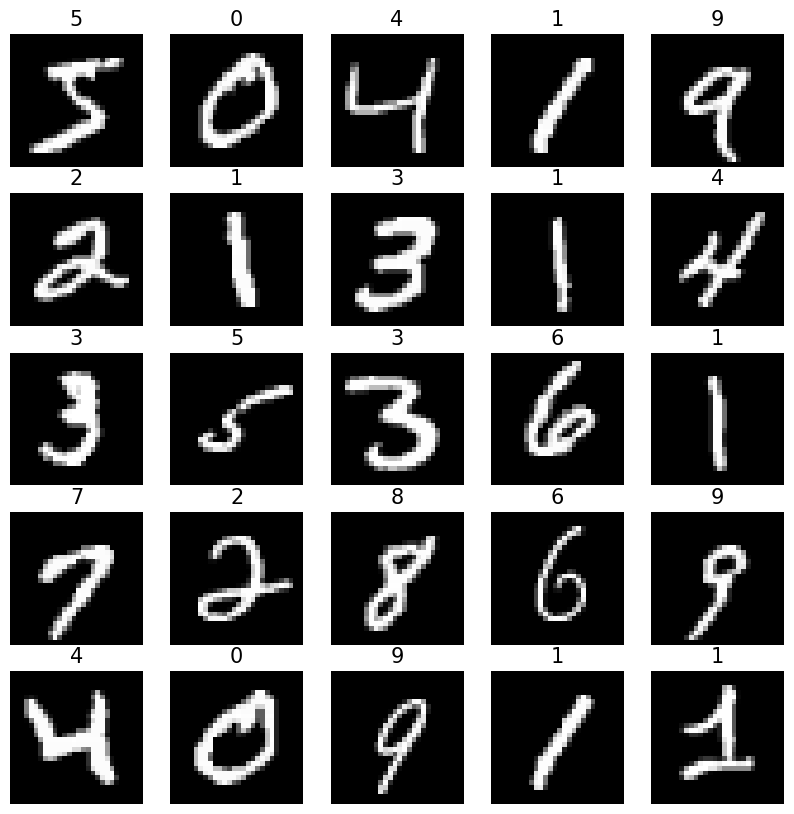

In [14]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title(y_train[i], fontsize = 15)
    plt.axis('off')

<Axes: xlabel='count'>

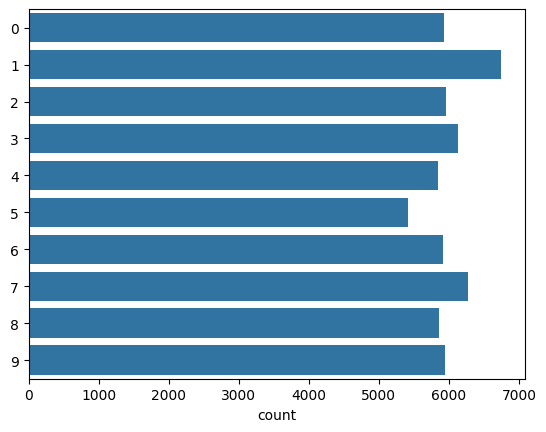

In [19]:
sns.countplot(y = y_train)

### Data Preparation

In [15]:
## Normalization
X_train = X_train/255
X_test = X_test/255

## Reshape to 1D array
X_train = X_train.reshape(-1,X_train[0].size)
X_test = X_test.reshape(-1,X_train[0].size)
X_train.shape, X_test.shape,

((60000, 784), (10000, 784))

In [20]:
### One hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [22]:
X_train.shape[1]

784

## Build Model

In [24]:
model = Sequential()
## Input layer
model.add(Dense(512, input_shape=(784,), activation='relu'))

## Hidden layers
model.add(Dense(128,  activation='relu'))

## Output layer
model.add(Dense(10,  activation='softmax'))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

history = model.fit(X_train, y_train,  batch_size=10, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
6000/6000 [==============================] - 25s 4ms/step - loss: 0.0896 - accuracy: 0.9737 - val_loss: 0.1171 - val_accuracy: 0.9635
Epoch 2/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0640 - accuracy: 0.9803 - val_loss: 0.0776 - val_accuracy: 0.9769
Epoch 3/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0507 - accuracy: 0.9841 - val_loss: 0.0883 - val_accuracy: 0.9770
Epoch 4/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0411 - accuracy: 0.9876 - val_loss: 0.0908 - val_accuracy: 0.9778
Epoch 5/10
6000/6000 [==============================] - 25s 4ms/step - loss: 0.0345 - accuracy: 0.9896 - val_loss: 0.0837 - val_accuracy: 0.9804
Epoch 6/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0339 - accuracy: 0.9902 - val_loss: 0.0905 - val_accuracy: 0.9803
Epoch 7/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0287 - accuracy: 0.9919 - val_loss: 0.1048 - val_ac

In [38]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1097 - accuracy: 0.9815


[0.10965579748153687, 0.9815000295639038]

### Predict on new image 

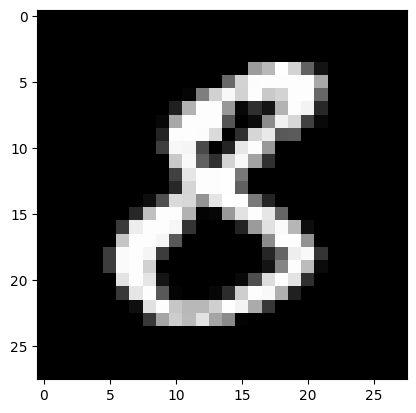

In [40]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
new = X_test[1234]

plt.imshow(new, cmap = 'gray')

In [50]:
new = new/255
new = new.reshape(-1,new.size)
new.shape

(1, 784)

In [51]:
np.argmax(model.predict(new))

1/1 [==============================] - 0s 35ms/step


8

## Use screenshot image saved in dataset to predict 

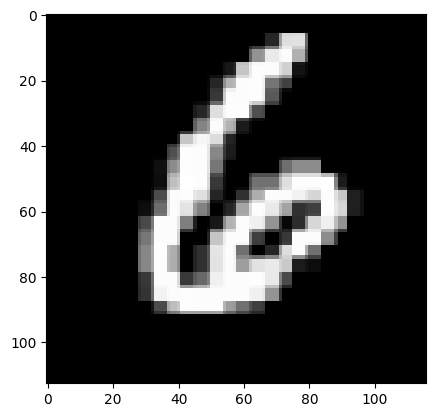

In [69]:
import cv2
img= cv2.imread('Datasets/Mnist_sample.png',0)
plt.imshow(img, cmap = 'gray')

In [70]:
img_resized = cv2.resize(img,(28,28))
img_resized.shape

(28, 28)

In [71]:
img_resized= img_resized/255
img_resized = img_resized.reshape(-1, img_resized.size)
np.argmax(model.predict(img_resized))

1/1 [==============================] - 0s 32ms/step


6